In [ ]:
pip install librosa==0.6.3 numpy soundfile==0.9.0 sklearn pyaudio==0.2.11

  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-68kgaoes/pyaudio/setup.py'"'"'; __file__='"'"'/tmp/pip-install-68kgaoes/pyaudio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-b8lc1hiu/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
import pandas as pd
import numpy as np

import os,glob
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprise'
}

In [ ]:
s_path = "/content/drive/My Drive/SGP 7th/Audio/"

file_emotion = []
file_path = []
for root, dirs, files in os.walk(s_path):
    for name in dirs:
      src_path = os.path.join(root, name)
      for filename in glob.glob(os.path.join(src_path, '*.wav')):
        file_name=os.path.basename(filename)
        
        part = file_name.split('.')[0]
        part = part.split('-')
        if((part[2] == '03') or (part[2] == '04') or (part[2] == '08')):
          file_path.append(filename)
          file_emotion.append(int(part[2]))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Audio = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio.Emotions.replace({3:'happy', 4:'sad', 8:'surprise'}, inplace=True)
Audio

,Emotions,Path
0,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
1,sad,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
2,surprise,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
3,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
4,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
...,...,...
571,surprise,/content/drive/My Drive/SGP 7th/Audio/Actor_02...
572,surprise,/content/drive/My Drive/SGP 7th/Audio/Actor_02...
573,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_02...
574,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_02...


In [ ]:
s_path = "/content/drive/My Drive/SGP 7th/AudioWAV/"

file_emotion = []
file_path = []
for root, dirs, files in os.walk(s_path):
  for file in files:
    file_name = "/content/drive/My Drive/SGP 7th/AudioWAV/" + file
    

    part = file_name.split('_')

    if part[2] == 'SAD':
      file_path.append(file_name)
      file_emotion.append('sad')
    
    elif part[2] == 'HAP':
      file_path.append(file_name)
      file_emotion.append('happy')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
AudioWav = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
AudioWav.Emotions.replace({13:'happy', 4:'sad'}, inplace=True)
AudioWav

,Emotions,Path
0,sad,/content/drive/My Drive/SGP 7th/AudioWAV/1036_...
1,happy,/content/drive/My Drive/SGP 7th/AudioWAV/1036_...
2,happy,/content/drive/My Drive/SGP 7th/AudioWAV/1036_...
3,happy,/content/drive/My Drive/SGP 7th/AudioWAV/1036_...
4,sad,/content/drive/My Drive/SGP 7th/AudioWAV/1036_...
...,...,...
1335,happy,/content/drive/My Drive/SGP 7th/AudioWAV/1012_...
1336,sad,/content/drive/My Drive/SGP 7th/AudioWAV/1012_...
1337,happy,/content/drive/My Drive/SGP 7th/AudioWAV/1012_...
1338,sad,/content/drive/My Drive/SGP 7th/AudioWAV/1012_...


In [ ]:
s_path = "/content/drive/My Drive/SGP 7th/TESS/"

file_emotion = []
file_path = []
for root, dirs, files in os.walk(s_path):
    for name in dirs:
      src_path = os.path.join(root, name)
      for filename in glob.glob(os.path.join(src_path, '*.wav')):
        file_name=os.path.basename(filename)
        
        part = file_name.split('.')[0]
        part = part.split('_')[2]
        
        if part=='ps':
            file_emotion.append('surprise')
            file_path.append(filename)
        
        elif part == 'happy':
            file_emotion.append(part)
            file_path.append(filename)
        
        elif part == 'sad':
            file_emotion.append(part)
            file_path.append(filename)
                
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
TESS = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
TESS.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
TESS

,Emotions,Path
0,surprise,/content/drive/My Drive/SGP 7th/TESS/OAF_Pleas...
1,surprise,/content/drive/My Drive/SGP 7th/TESS/OAF_Pleas...
2,surprise,/content/drive/My Drive/SGP 7th/TESS/OAF_Pleas...
3,surprise,/content/drive/My Drive/SGP 7th/TESS/OAF_Pleas...
4,surprise,/content/drive/My Drive/SGP 7th/TESS/OAF_Pleas...
...,...,...
2395,sad,/content/drive/My Drive/SGP 7th/TESS/TESS Toro...
2396,sad,/content/drive/My Drive/SGP 7th/TESS/TESS Toro...
2397,sad,/content/drive/My Drive/SGP 7th/TESS/TESS Toro...
2398,sad,/content/drive/My Drive/SGP 7th/TESS/TESS Toro...


In [ ]:
s_path = "/content/drive/My Drive/SGP 7th/ALL/"

file_emotion = []
file_path = []
for root, dirs, files in os.walk(s_path):
  for file in files:
    file_name = "/content/drive/My Drive/SGP 7th/ALL/" + file
    

    part = file_name.split('_')[1]
    ele = part[:-6]
    
    if ele=='h':
        file_emotion.append('happy')
        file_path.append(file_name)

    elif ele=='sa':
        file_emotion.append('sad')
        file_path.append(file_name)

    elif ele=='su':
        file_emotion.append('surprise')
        file_path.append(file_name)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
ALL = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
ALL.Emotions.replace({3:'happy', 4:'sad', 8:'surprise'}, inplace=True)
ALL

,Emotions,Path
0,happy,/content/drive/My Drive/SGP 7th/ALL/DC_h05.wav
1,happy,/content/drive/My Drive/SGP 7th/ALL/DC_h07.wav
2,happy,/content/drive/My Drive/SGP 7th/ALL/DC_h13.wav
3,happy,/content/drive/My Drive/SGP 7th/ALL/DC_h10.wav
4,happy,/content/drive/My Drive/SGP 7th/ALL/DC_h15.wav
...,...,...
175,sad,/content/drive/My Drive/SGP 7th/ALL/KL_sa01.wav
176,surprise,/content/drive/My Drive/SGP 7th/ALL/KL_su03.wav
177,surprise,/content/drive/My Drive/SGP 7th/ALL/KL_su08.wav
178,surprise,/content/drive/My Drive/SGP 7th/ALL/KL_su11.wav


In [ ]:
data_path = pd.concat([Audio, AudioWav, TESS, ALL], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
1,sad,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
2,surprise,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
3,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...
4,happy,/content/drive/My Drive/SGP 7th/Audio/Actor_17...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


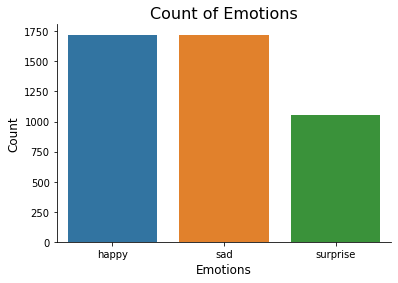

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

/content/drive/My Drive/SGP 7th/Audio/Actor_17/03-01-03-02-02-01-17.wav


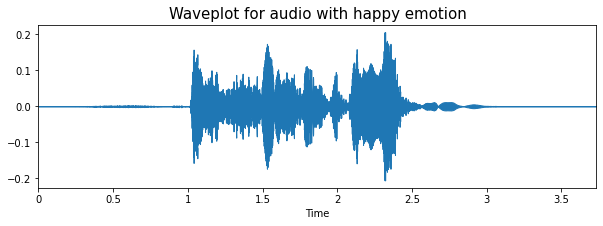

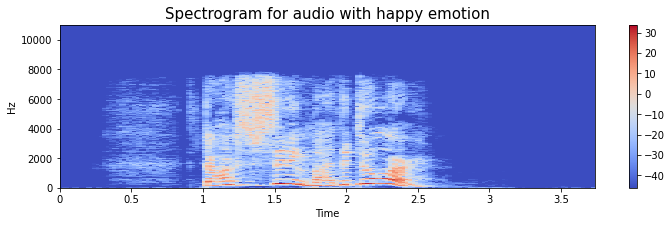

In [ ]:
# to play the audio files
from IPython.display import Audio

emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
print(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
import soundfile

def extract_features(path):
    # ZCR
    data, sample_rate = librosa.load(path, duration=5, offset=0.6)

    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [ ]:
X, Y = [], [] 
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = extract_features(path)
    X.append(feature)
    # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
    Y.append(emotion)
print("X: ",X)
print("Y: ",Y)

X:  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(data_path)

4496

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(np.array(X), Y, test_size=0.2, random_state=9)

In [ ]:
len(y_train)

3596

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pickle

model=MLPClassifier(alpha=0.01, batch_size=32, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
filename = '/content/drive/My Drive/SGP 7th/finalized_model.bin'
pickle.dump(model, open(filename, 'wb'))

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 0.89%


In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 2s (117 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144617 files and directories currently installed.)
Preparing to u

In [ ]:
pip install pyaudio

  Using cached https://files.pythonhosted.org/packages/ab/42/b4f04721c5c5bfc196ce156b3c768998ef8c0ae3654ed29ea5020c749a6b/PyAudio-0.2.11.tar.gz
  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp36-cp36m-linux_x86_64.whl size=51616 sha256=c360c80aac6dfca454b497a725a140d2f28963849718141323c4efbe99e65a35
  Stored in directory: /root/.cache/pip/wheels/f4/a8/a4/292214166c2917890f85b2f72a8e5f13e1ffa527c4200dcede
Successfully built pyaudio


In [ ]:
import pyaudio
import os
import wave
import pickle
from sys import byteorder
from array import array
from struct import pack
from sklearn.neural_network import MLPClassifier

if __name__ == "__main__":
    # load the saved model (after training)
    filename = "/content/drive/My Drive/SGP 7th/Audio/Actor_17/03-01-05-02-02-01-17.wav"
    # extract features and reshape it
    features = extract_features(filename).reshape(1,-1)
    # predict
    result = model.predict(features)[0]
    # show the result !
    print("result:", result)

result: happy


In [ ]:
if(result == 'happy'):
  s_path = "/content/drive/My Drive/SGP 7th/Happy/"
  for root, dirs, files in os.walk(s_path):
    for file in files:
      Audio(file)